##**Project Title: E-scooter and Students detection**

Team Members: -
* Deepakindresh Narayana Gandhi
*  Ramsundar Konety Govindrajan
* Muralidhar Radhakrishnan

## Objective

To identify e-scooters and the number of students in the classroom using YoloV8 (You Look Only Once).

#Importing Libraries and Data


In [ ]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Importing Libraries for Displaying image

In [ ]:
from IPython.display import display, Image

Importing Annotated data from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CeSOChvnfUgiD5h1J4I0")
project = rf.workspace("university-of-california-riverside-vwtgf").project("students-and-scooters")
dataset = project.version(3).download("yolov8")


In [ ]:
print(dataset.location)

/content/datasets/Students-and-Scooters-3


Train Test Split


*   Train - 312 Images
*   Cross Validation - 14 Images
*   Test Set - 15 Images



#Model

##Training

Training Yolo model for 60 epochs and choosing the best and last model for testing

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 75.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Students-and-Scooters-3/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

## Testing and Evaluation

Confusion Matrix for Scooter and Students

/content


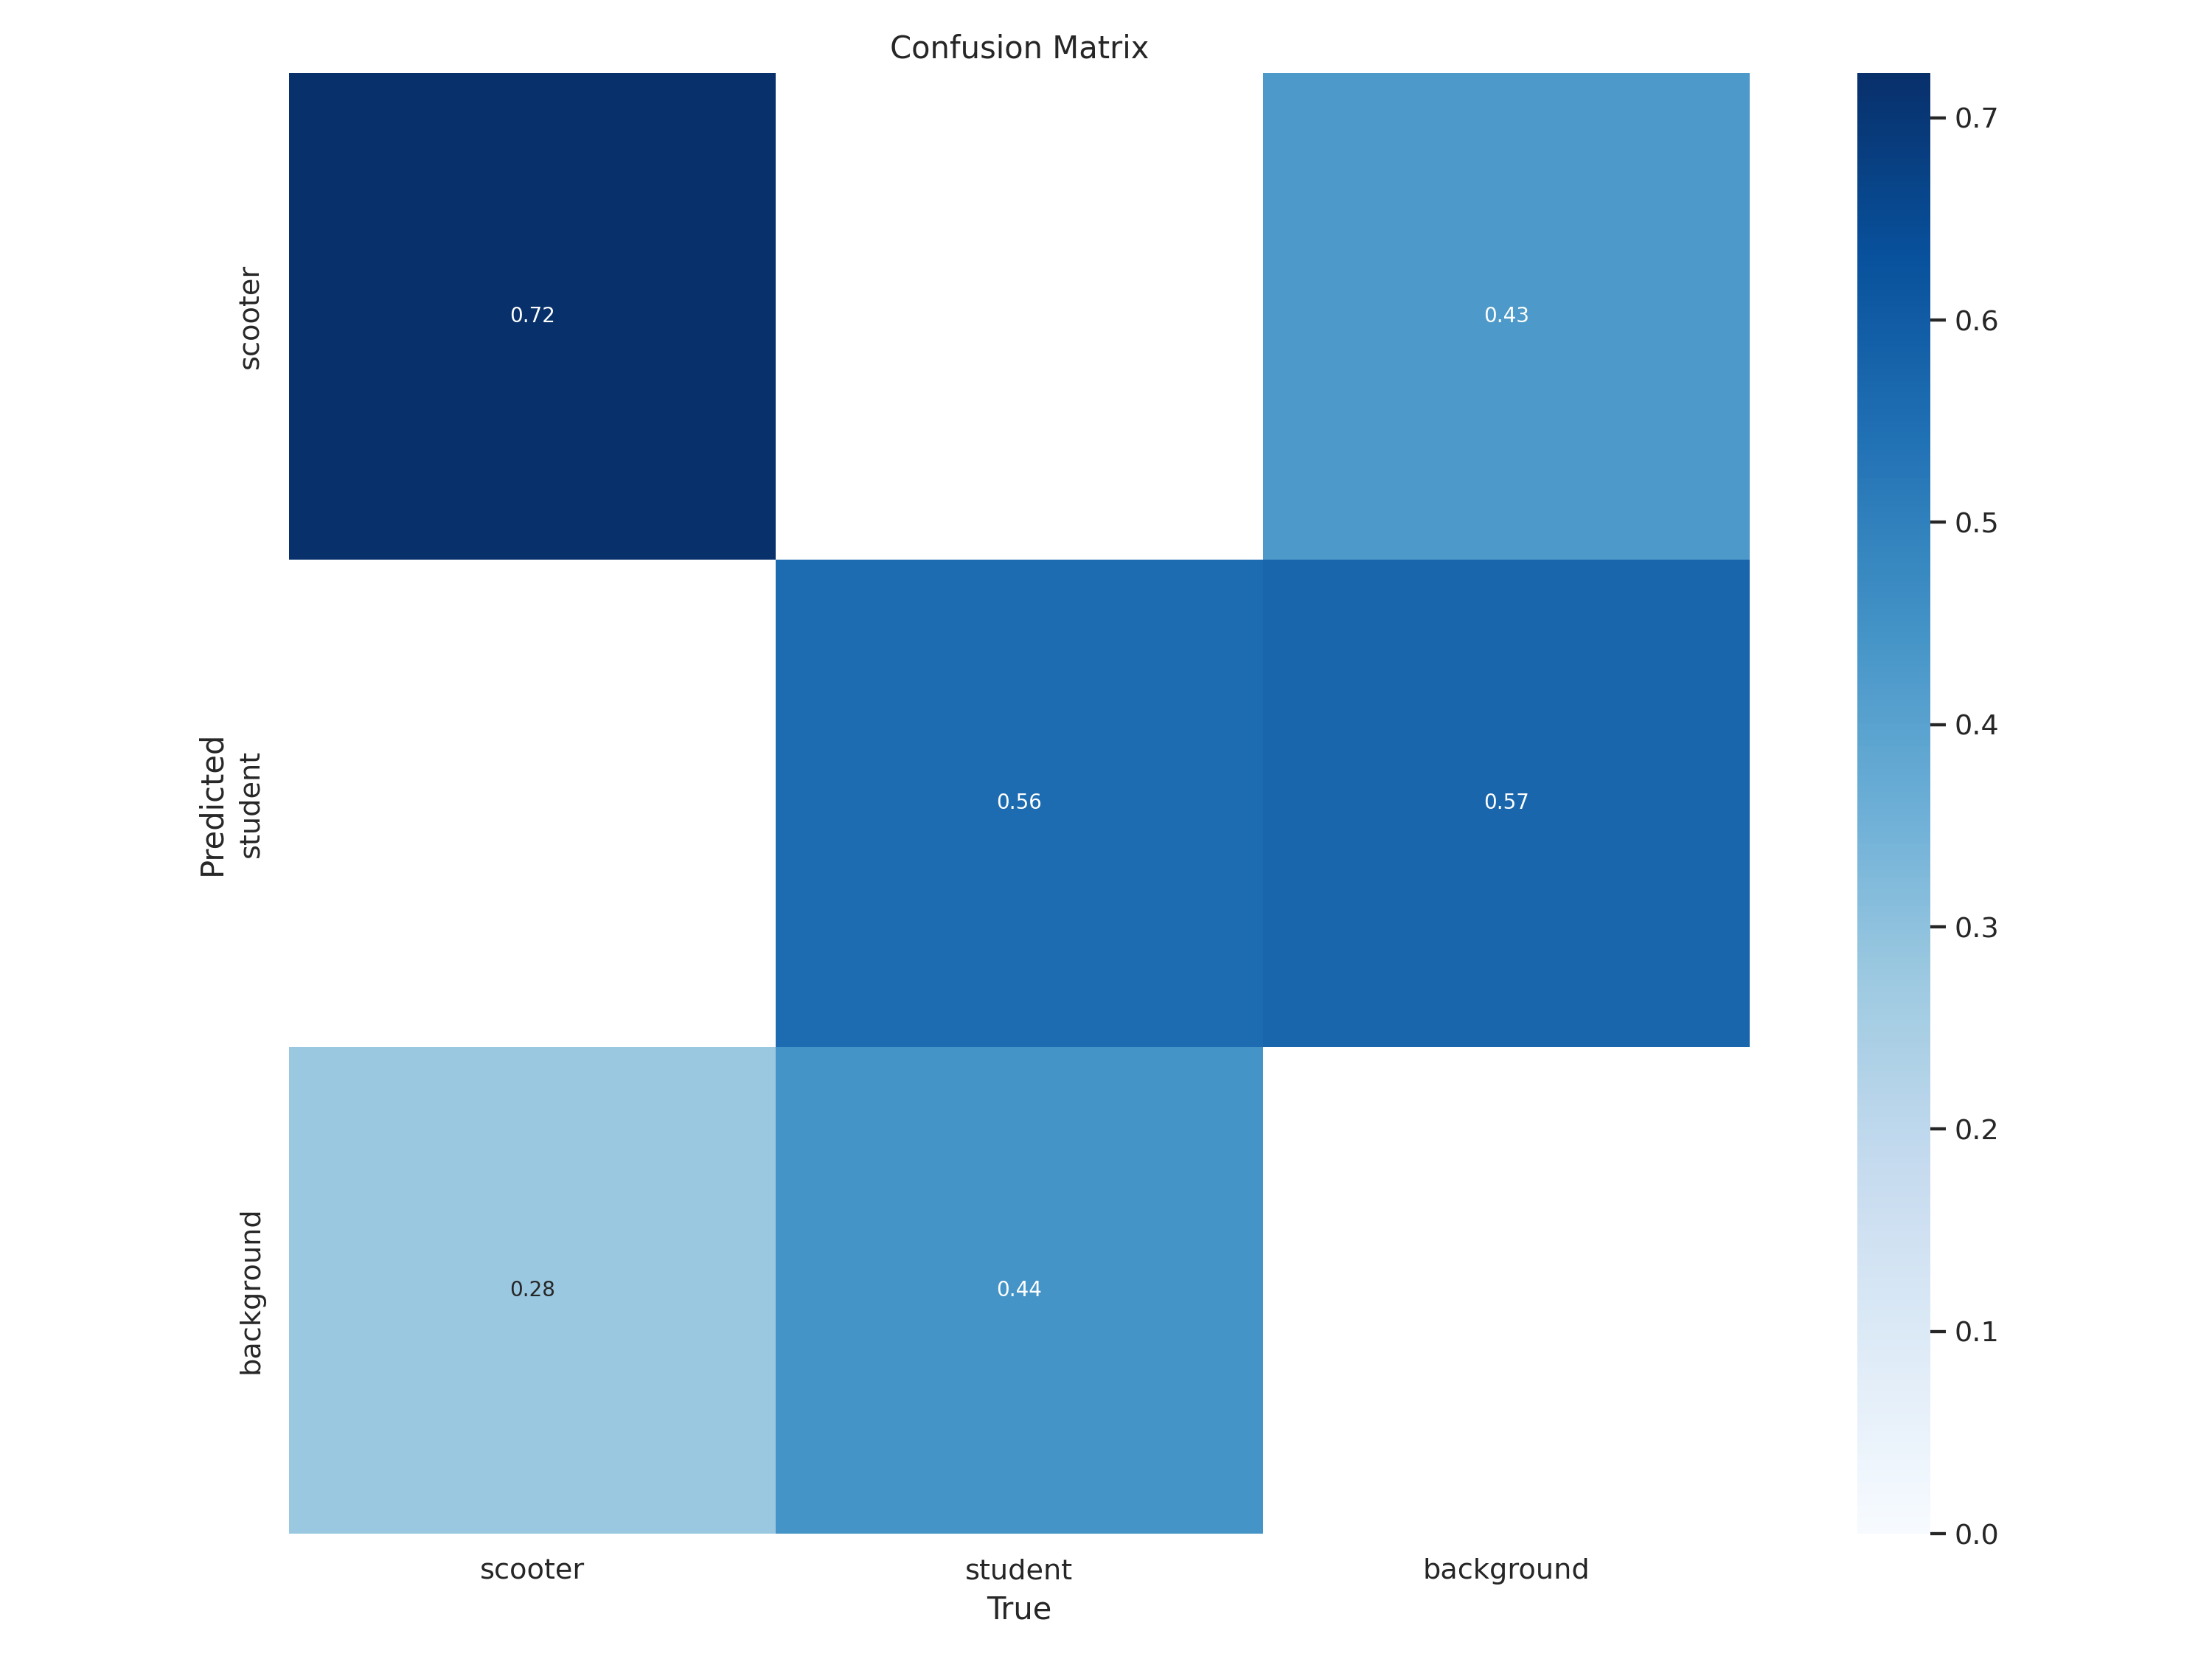

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


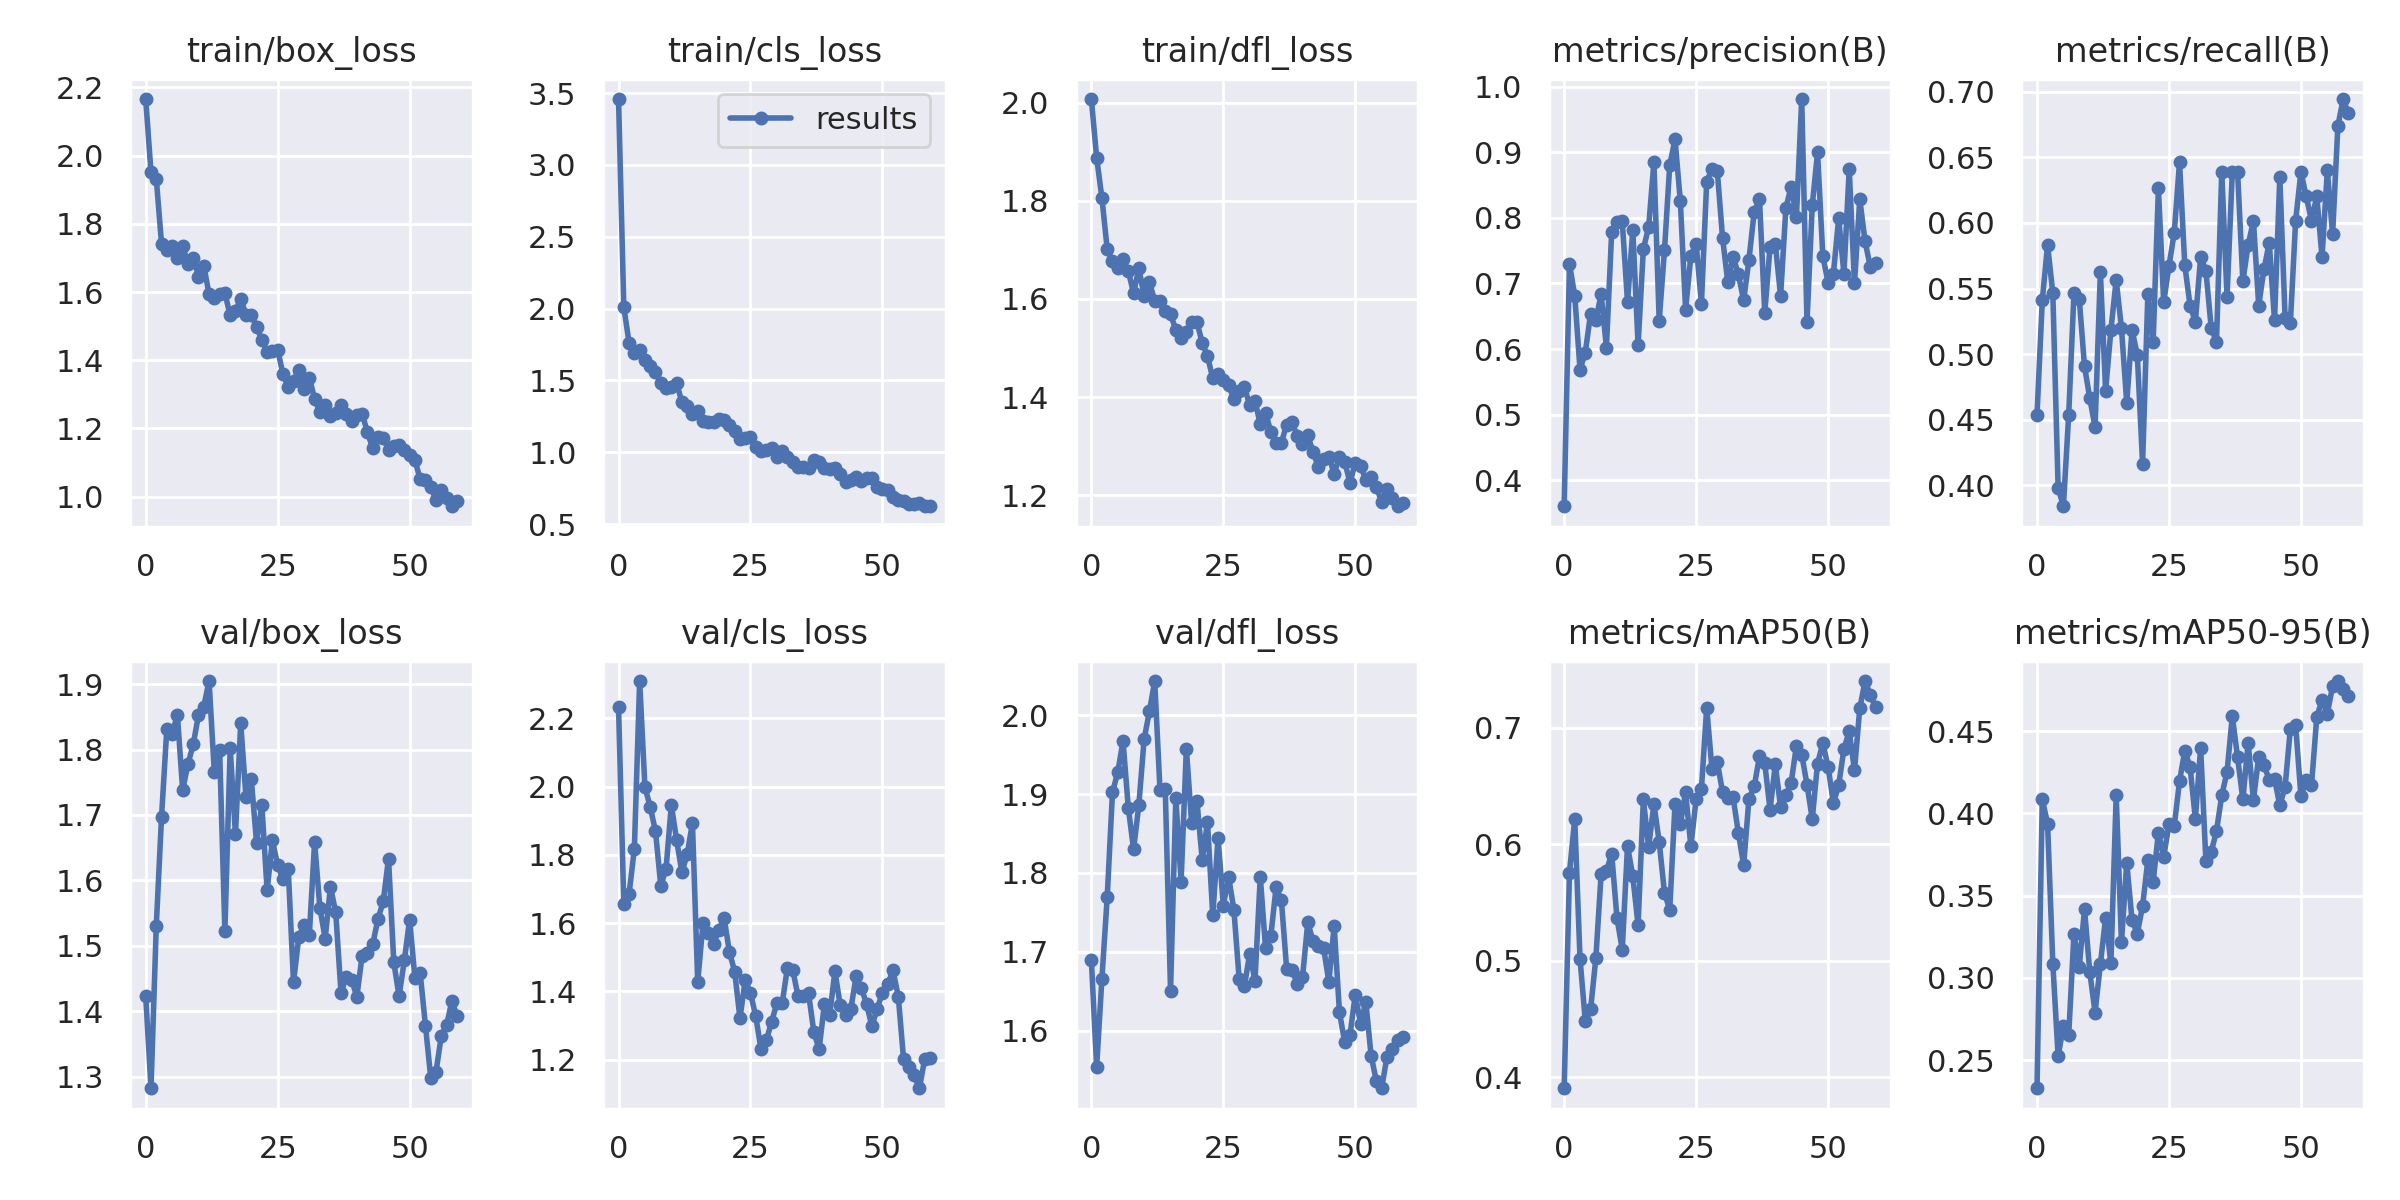

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		train_batch1002.jpg
confusion_matrix.png				   results.csv		train_batch1.jpg
events.out.tfevents.1701718176.8c35c5a42212.517.0  results.png		train_batch2.jpg
F1_curve.png					   train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					   train_batch1000.jpg	val_batch0_pred.jpg
PR_curve.png					   train_batch1001.jpg	weights


Checking Performance on Validation set

/content


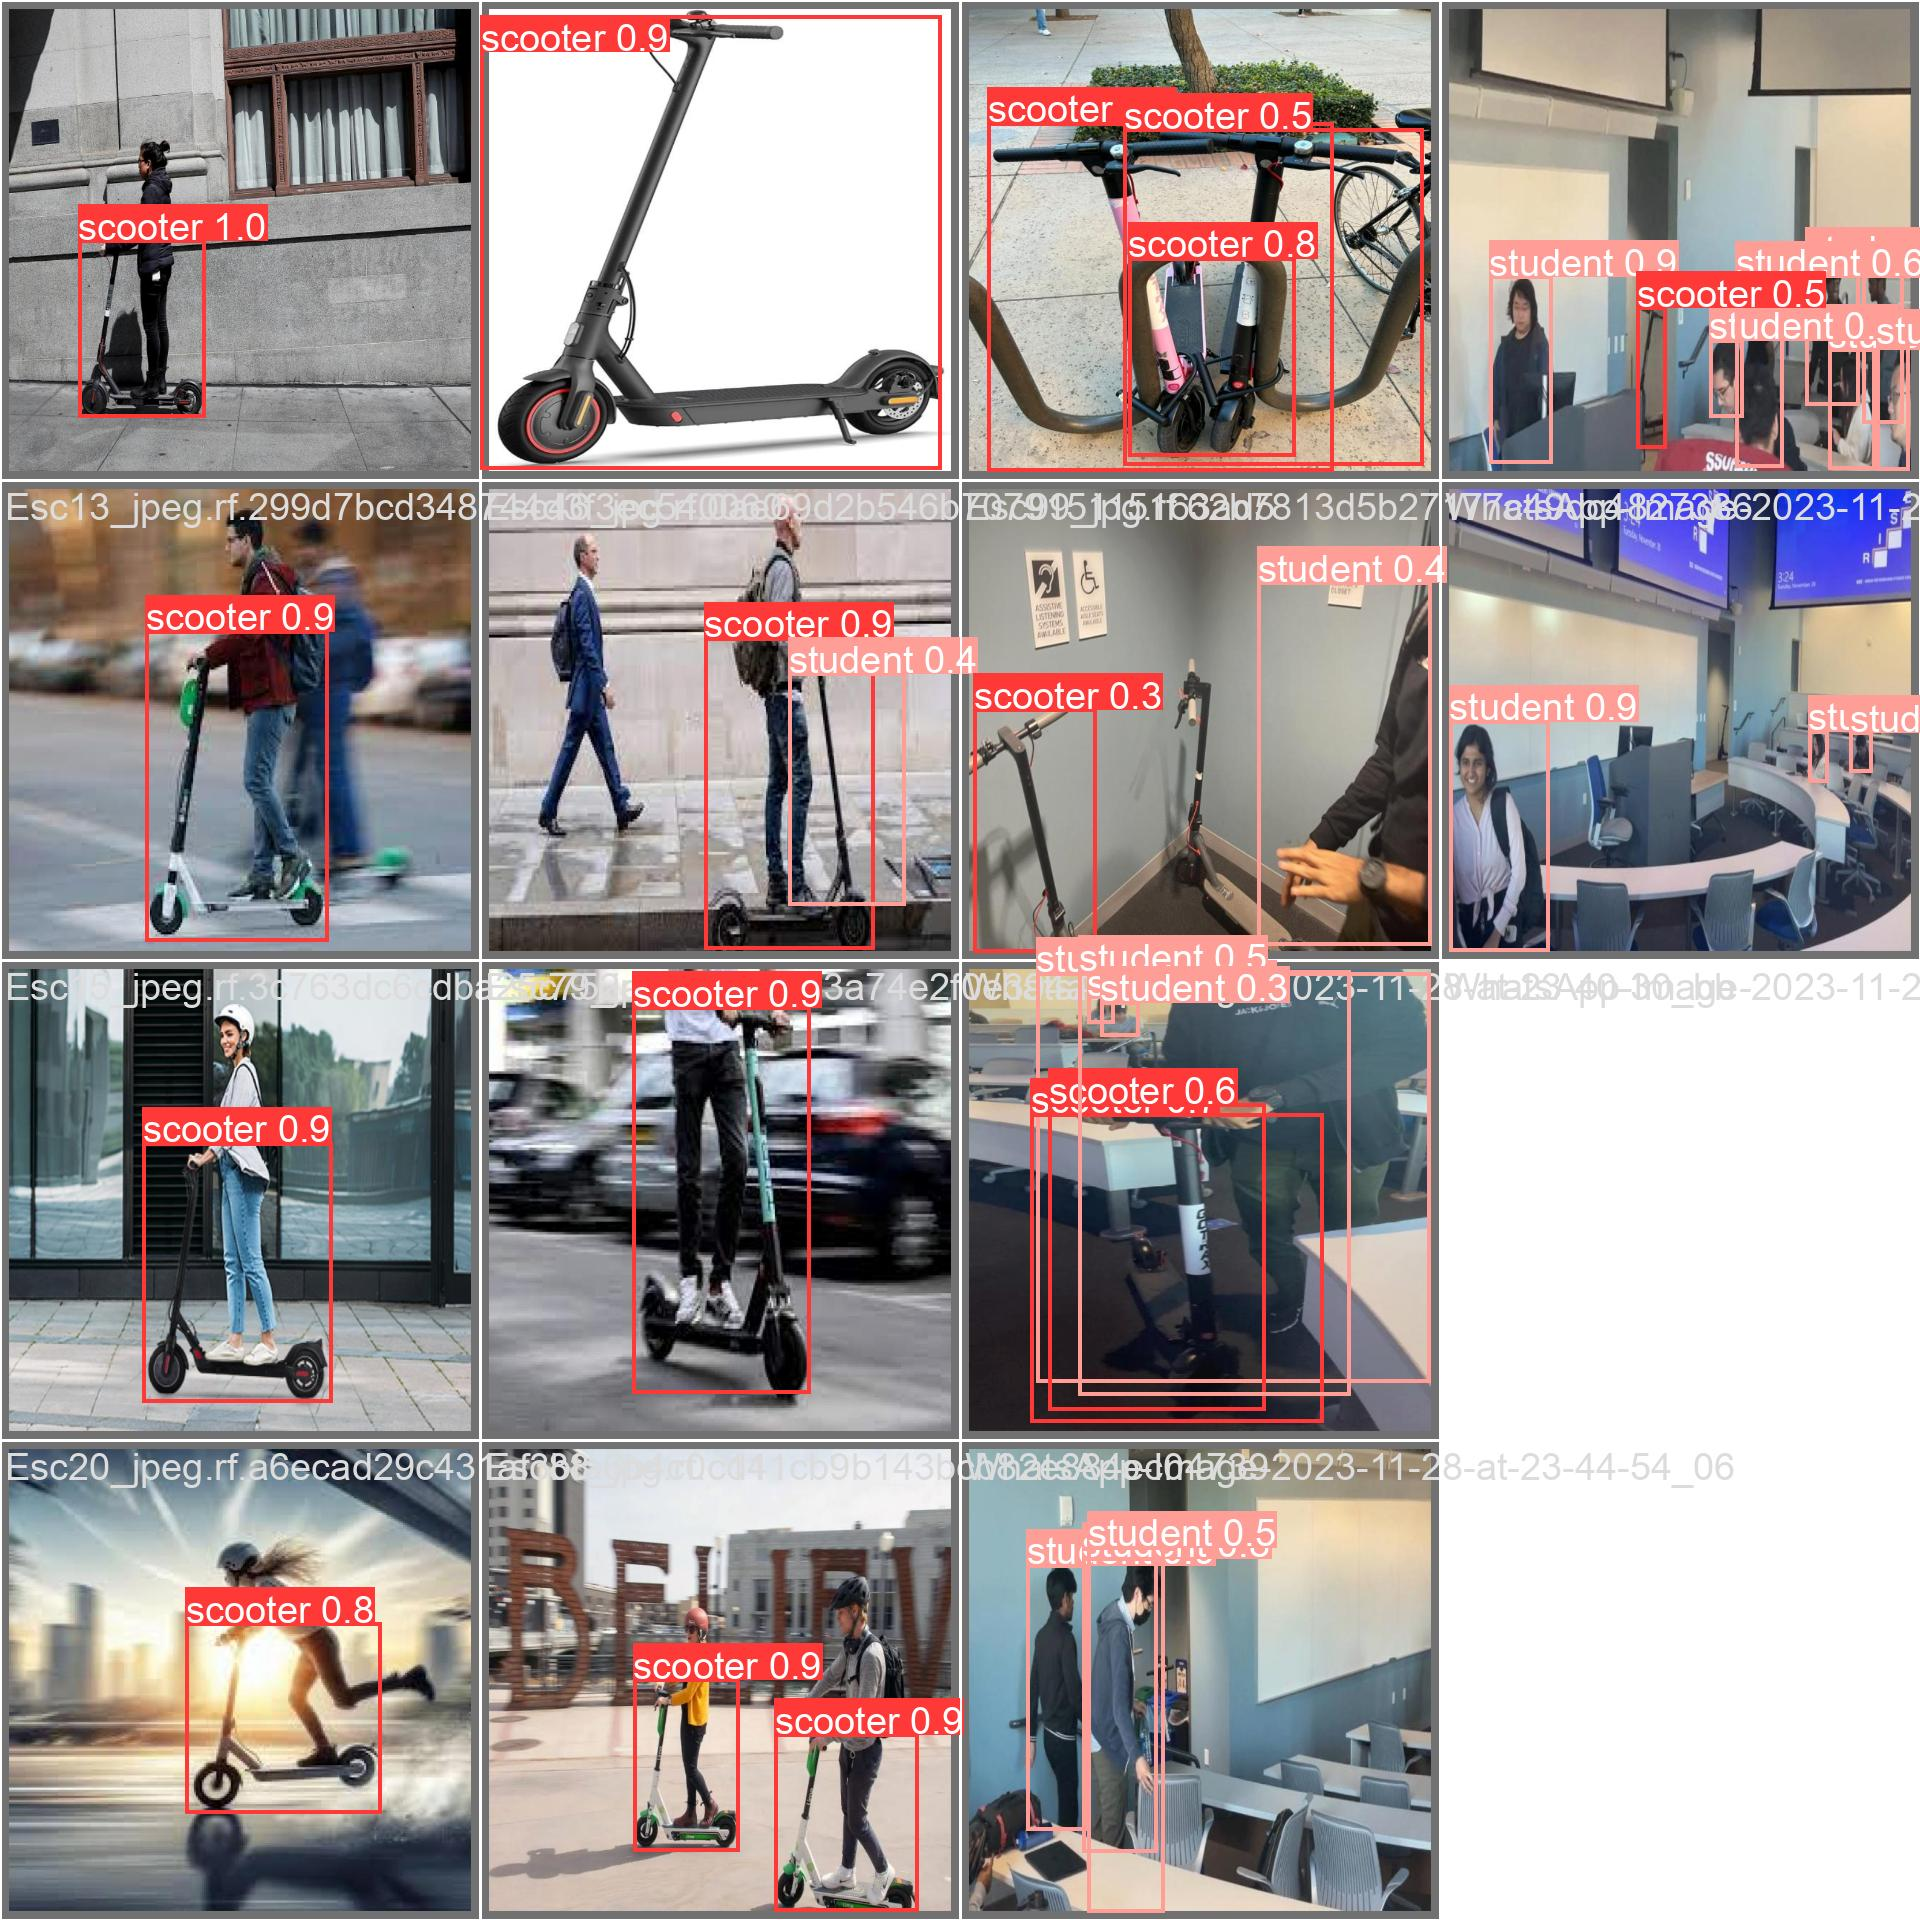

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Using the Best model to predict (Found by using CV)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-04 19:50:11.735874: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 19:50:11.735936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 19:50:11.735976: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 19:50:13.488476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Students-and-Scooters-3/valid

Predicting the images by setting the confidence to 60%

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.60 source={dataset.location}/test/images save=True

/content
2023-12-04 19:50:27.254941: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 19:50:27.254999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 19:50:27.255035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 19:50:28.286634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/14 /content/datasets/Students-and-Scooters-3/test/ima

Results

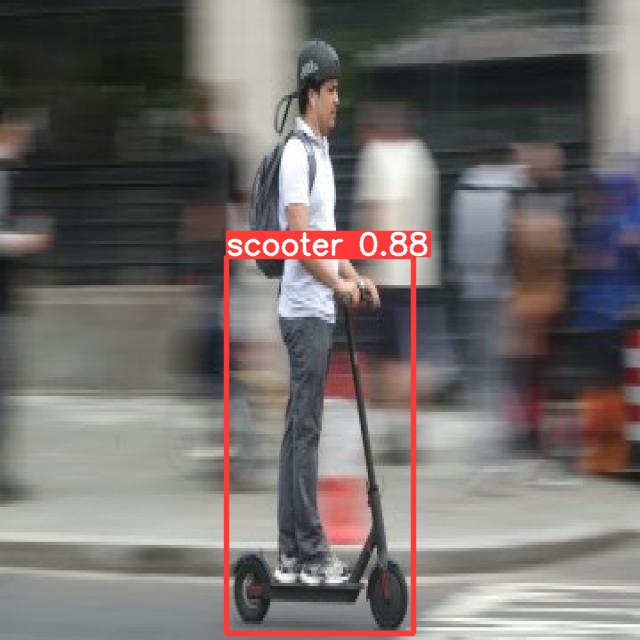

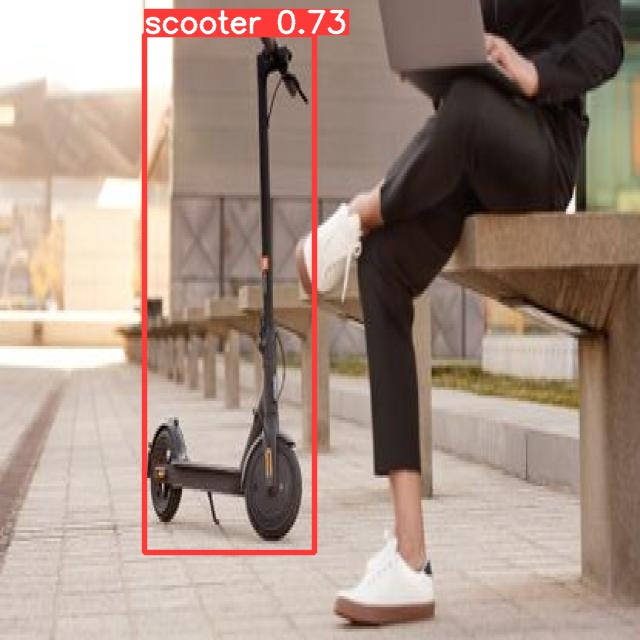

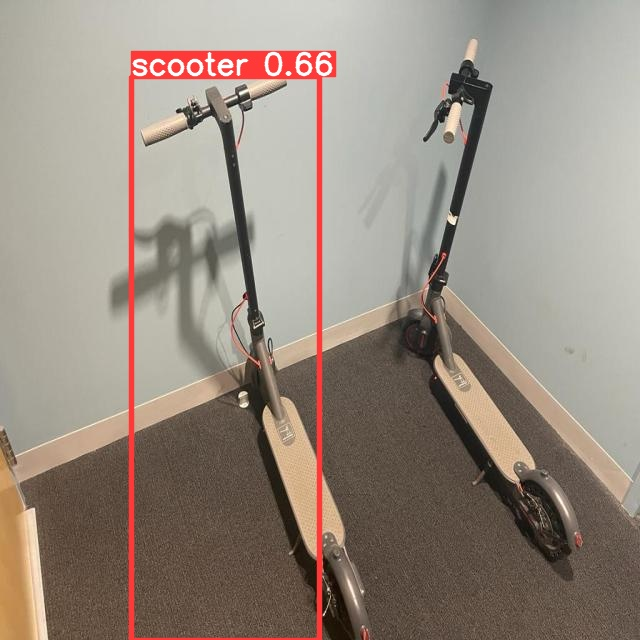

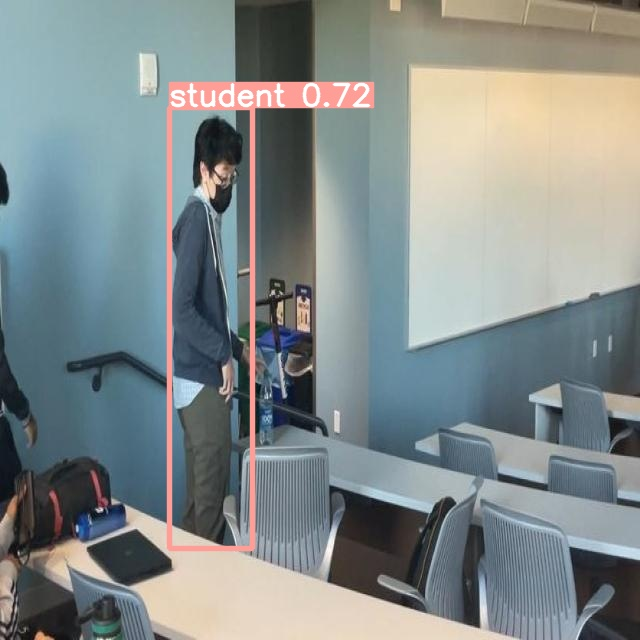

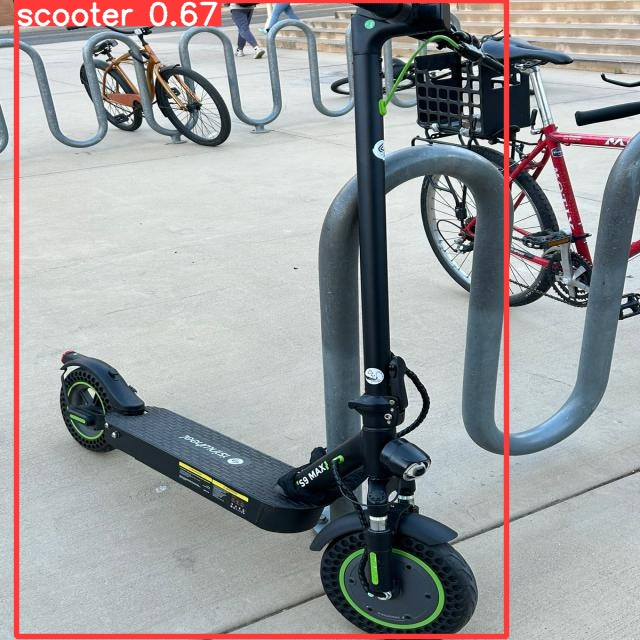

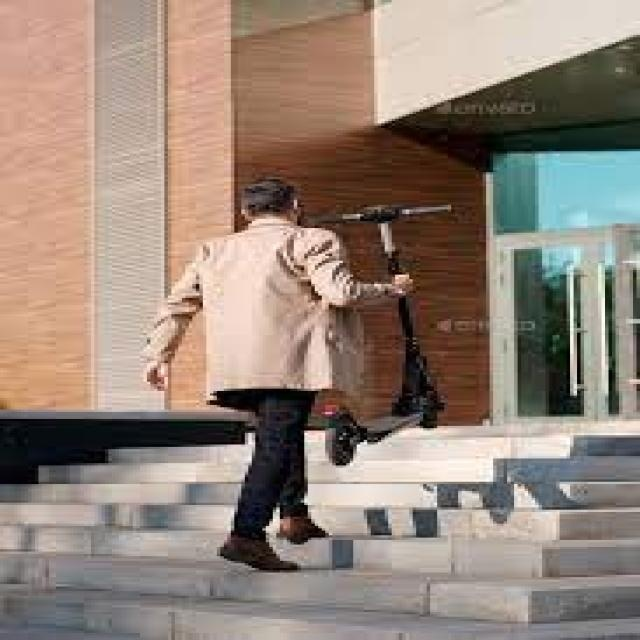

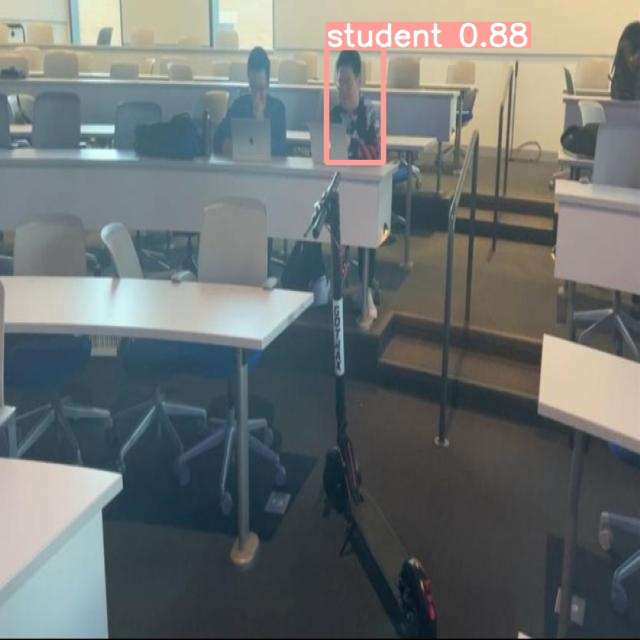

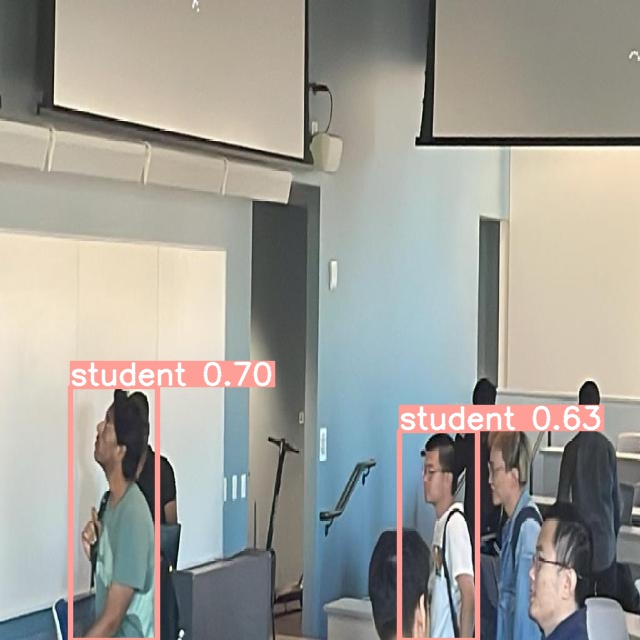

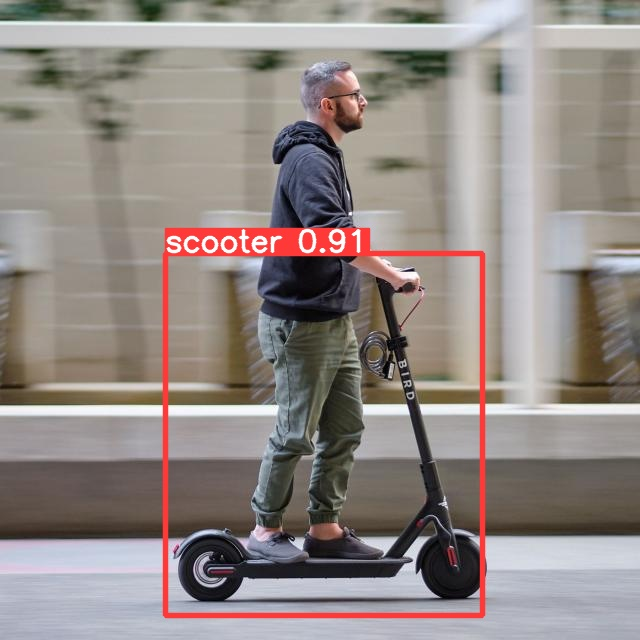

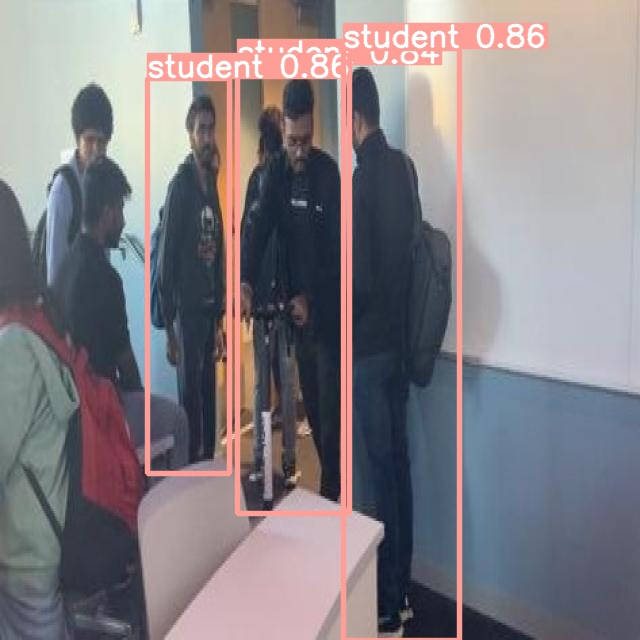

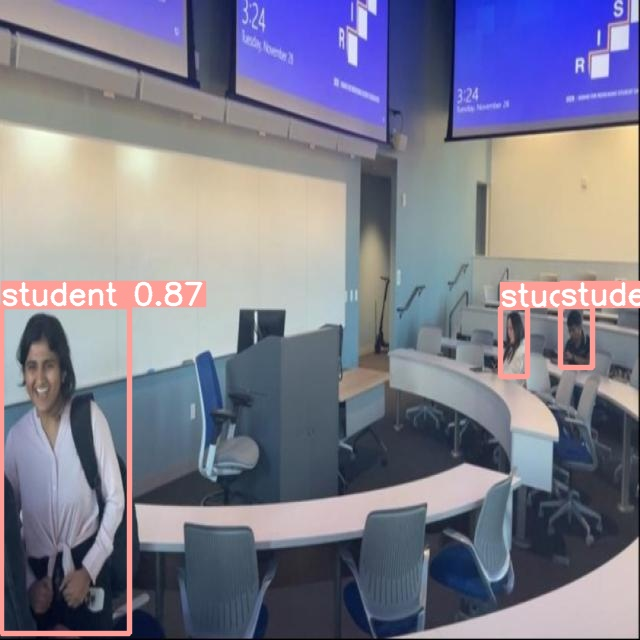

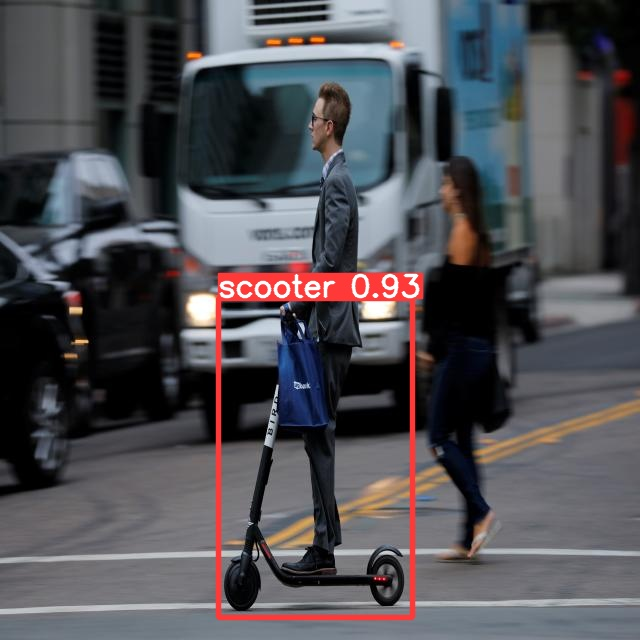

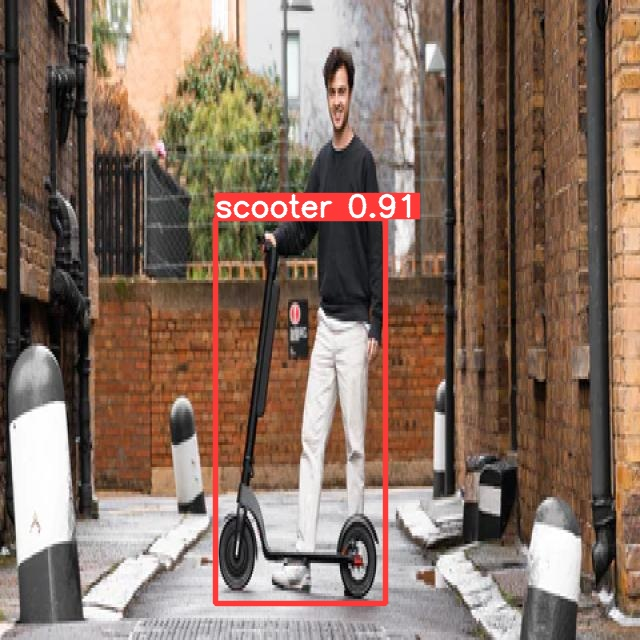

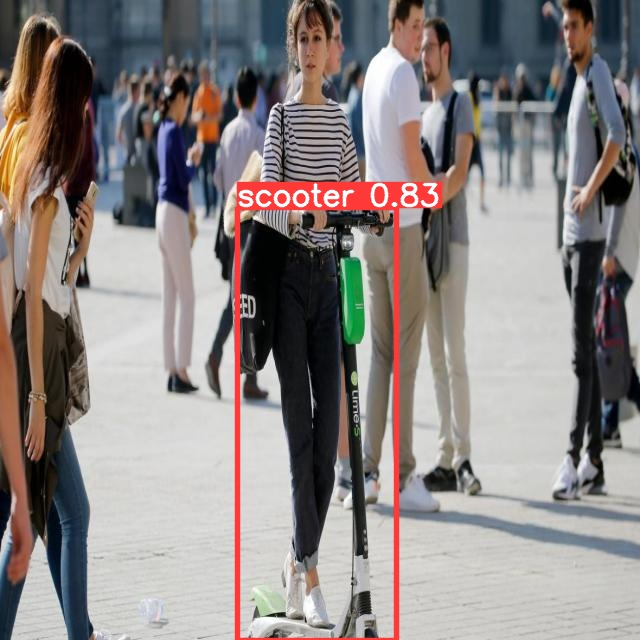

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")